<a href="https://colab.research.google.com/github/isaacsemerson/deeplearning-python-fchollet/blob/main/fchollet_chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# run this before anything else
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Listing 4.1 - This loads the imdb reviews dataset from keras. This set contains 50000 reviews, split between the training and test sets. Half of the reviews are positive, the other half are negative.

num_words within load_data() will keep only the top amount of num_words occuring in the dataset. With the normal word variety we would be training on too many unique words, making classification less accurate (the model may perform significantly worse on the test dataset).

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print("First sample decode:", decoded_review)

First sample decode: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they ha

Listing 4.2 - This is how you would translate a review to English. get_word_index() returns a dictionary of word/index KVPs. We then flip the dictionary as we want to get words (original key) based on index (original value). The "i - 3" is special to this dataset. The first 3 indicies (0-2) are reserved for special utilities.

In [7]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for sentenceIndex, sentence in enumerate(sequences):
    for wordIndex in sentence:
      results[sentenceIndex, wordIndex] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print("Shape of vectorized training data:", x_train.shape)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Shape of vectorized training data: (25000, 10000)


Listing 4.3 - We need to feed our model a standard data length (and the model does not accept lists). The default dataset has a variable sentence length, so the above function turns each sentence into a vector row. Each column represents the index of a word in our dictionary. If a specific word is included in our sentence, the corresponding column is marked by a 1.

This method does prevent us from tracking the number of times a specific word is said, however I assume that does not matter for the binary classification we are attempting here.

The last two lines vectorize our labels in preparation for the model.

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Listing 4.4 - Defining our model. The book holds our hand here and says it will explain more in chapter 5, but for now we are told that a stack of dense layers works well on binary classifcation (vectors to scalars, specifically 0 or 1). With that being said, a stack of dense layers requires us to decide how many layers and what the output units will be. However, the book also decides this, reserving explaination until the next chapter. It does say that larger output units will result in a more complex representation/transformation of the data, but that may cause the model to overfit.

Activations:
- Relu, this essentially zeros out negative values (think of an xy axis, a relu activation will prevent y from ever being negative)
- Sigmoid, this squishes the number to a probability value between 0 and 1.

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Listing 4.5 - Here we are compiling the model.

Optimizer - Book advises us to use rmsprop as an optimizer as it is a good default choice for most models.

Loss - The book advises us to go with crossentropy as it is "usually the best choice for binary classification". This loss function compares the distance between probability distributions for a batch of predictions and targets (example, 60% of this batch is positive for targets but only 40% of our predictions are positive).

Metrics - Accuracy here as a default (an abstract of the loss value).

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Listing 4.6 - Setting aside part of the training data to be used for validation. Accuracy of the model is calculated using the validation data, however we do not adjust the model based on the results.

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.5145 - accuracy: 0.7921 - val_loss: 0.4090 - val_accuracy: 0.8428
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3207 - accuracy: 0.8923 - val_loss: 0.3288 - val_accuracy: 0.8714
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2445 - accuracy: 0.9173 - val_loss: 0.2857 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1986 - accuracy: 0.9341 - val_loss: 0.2805 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1663 - accuracy: 0.9447 - val_loss: 0.2796 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1426 - accuracy: 0.9531 - val_loss: 0.2906 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1232 - accuracy: 0.9598 - val_loss: 0.2928 - val_accuracy: 0.8866
Epoch 8/20
30

Listing 4.7 - This is the training step. We are running 20 epoch in a batch size of 512. Every epoch reads out the duration, loss/accuracy for the training data, and loss/accuracy for the validation data.

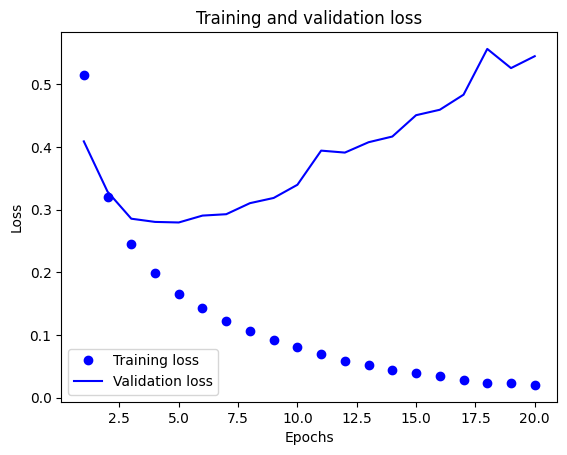

In [17]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Listing 4.8 - Here we are plotting the loss function for the training and validation data. The training data looks as expected, however the validation data trends upwards after the 3rd epoch.

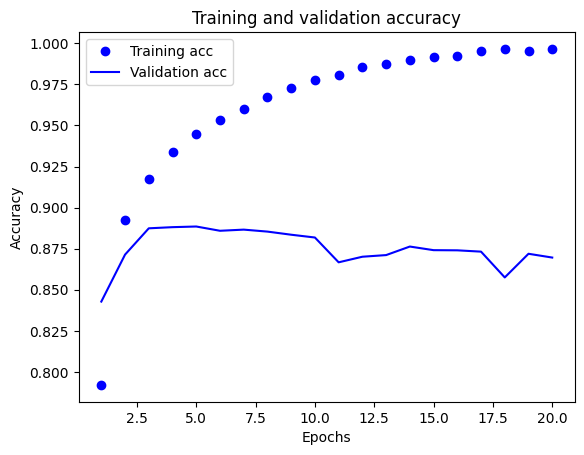

In [19]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Listing 4.9 - This plots the accuracy for training and validation data. Again we are seeing the training data increase to near 100% as expected, but unfortunately the validation data gets worse. This is an example of a model overfitting to the training data.

In [20]:
model = keras.Sequential([
    layers.Dense("16", activation="relu"),
    layers.Dense("16", activation="relu"),
    layers.Dense("1", activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4822 - accuracy: 0.8123
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2853 - accuracy: 0.9007
Epoch 3/4
49/49 [==============================] - 2s 38ms/step - loss: 0.2244 - accuracy: 0.9174
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2890 - accuracy: 0.8846


Listing 4.10 - One way to solve overfitting is to lower the epoch count. This is especially true in cases like this where we see the validation data improve up to a certain epoch before getting worse.

Overfitting is essentially when your model trains too much on the training data and overoptimizes for that set exclusively. This causes incorrect representations to be made of the data. Chapter 5 explains other solutions to overfitting.

As we see here, the final results from our evaluate() on the test data is an 89% accuracy rate, much better than 20 epochs.

In [21]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.2792618 ],
       [0.9999502 ],
       [0.9232727 ],
       ...,
       [0.10269347],
       [0.11780463],
       [0.69913834]], dtype=float32)

Listing 4.10b - Here is an example of using the predict function, which is how you can use the model after training.

The resulting numbers are predictions for each review being positive or negative.